# Job Dissatisfaction — A Comparison Between Length of Service and Age Based on Employees Exit Surveys 

### Using exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia, we attempt to answer the following questions:
1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Below is a preview of a couple columns we'll work with from the dete_survey.csv:

* ID: An id used to identify the participant of the survey.
* SeparationType: The reason why the person's employment ended.
* Cease Date: The year or month the person's employment ended.
* DETE Start Date: The year the person began employment with the DETE.
    
Below is a preview of a couple columns we'll work with from the tafe_survey.csv:

* Record ID: An id used to identify the participant of the survey.
* Reason for ceasing employment: The reason why the person's employment ended.
* LengthofServiceOverall: The length of the person's employment (in years).

In [1]:
import pandas as pd
import numpy as np

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [2]:
tafe_survey.info()
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


From our work in the previous screen, we can first make the following observations:

* The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.
* Both the dete_survey and tafe_survey dataframes contain many columns that we don't need to complete our analysis.
* Each dataframe contains many of the same columns, but the column names are different.
* There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

In [3]:
# Read in the data again, but this time read `Not Stated` values as `NaN`
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

# Quick exploration of the data
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

In [5]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

We've droppped all the columns in tafe_survey that don't directly answer the question why an employee left. 

In [6]:
dete_survey_updated.columns = dete_survey_updated.columns.str.strip().str.replace(' ','_').str.lower()

In [7]:
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
id                                     822 non-null int64
separationtype                         822 non-null object
cease_date                             788 non-null object
dete_start_date                        749 non-null float64
role_start_date                        724 non-null float64
position                               817 non-null object
classification                         455 non-null object
region                                 717 non-null object
business_unit                          126 non-null object
employment_status                      817 non-null object
career_move_to_public_sector           822 non-null bool
career_move_to_private_sector          822 non-null bool
interpersonal_conflicts                822 non-null bool
job_dissatisfaction                    822 non-null bool
dissatisfaction_with_the_department    822 non-null bool
physical_work_envir

In [8]:
tafe_survey_updated = tafe_survey_updated.rename(columns={'Record ID': 'id', 
                                                  'CESSATION YEAR': 'cease_date',
                                                  'Reason for ceasing employment': 'separationtype',
                                                  'Gender. What is your Gender?': 'gender', 
                                                  'CurrentAge. Current Age': 'age',
                                                  'Employment Type. Employment Type': 'employment_status',
                                                  'Classification. Classification': 'position', 
                                                  'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                                                  'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service' })


In [9]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [10]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


The column titles in tafe_survey_update were changed to match the ones in dete_survey_update 

In [11]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [12]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [13]:
pattern = r"Resignation"
resignation = dete_survey_updated['separationtype'].str.contains(pattern)

In [14]:
dete_resignations = dete_survey_updated[resignation].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

In [15]:
dete_resignations

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN
12,13,Resignation-Other reasons,2012,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
14,15,Resignation-Other employer,2012,2007.0,2010.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN
16,17,Resignation-Other reasons,2012,NaN,NaN,Teacher Aide,NaN,South East,NaN,Permanent Part-time,...,False,False,False,Male,61 or older,NaN,NaN,NaN,NaN,NaN
20,21,Resignation-Other employer,2012,1982.0,1982.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,NaN
21,22,Resignation-Other reasons,2012,1980.0,2009.0,Cleaner,NaN,Darling Downs South West,NaN,Permanent Part-time,...,False,False,False,Female,51-55,NaN,NaN,NaN,NaN,NaN


In [16]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
09/2010      1
07/2012      1
07/2006      1
2010         1
Name: cease_date, dtype: int64

In [17]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str[-4:]

In [18]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)

In [19]:
dete_resignations['cease_date']

3      2012.0
5      2012.0
8      2012.0
9      2012.0
11     2012.0
12     2012.0
14     2012.0
16     2012.0
20     2012.0
21     2012.0
22     2012.0
23     2012.0
25     2012.0
27     2012.0
33     2012.0
34     2012.0
37     2012.0
39     2012.0
40     2012.0
41     2012.0
42     2012.0
43     2012.0
48     2012.0
50     2012.0
51     2012.0
55     2012.0
57     2012.0
61     2012.0
69     2012.0
71     2012.0
        ...  
747    2014.0
751    2013.0
752    2013.0
753    2013.0
755    2013.0
762    2006.0
766    2014.0
769    2013.0
770       NaN
771    2014.0
774       NaN
784    2013.0
786    2014.0
788       NaN
789    2014.0
790    2014.0
791       NaN
794    2013.0
797       NaN
798       NaN
802    2013.0
803    2014.0
804    2014.0
806    2013.0
807    2013.0
808    2013.0
815    2014.0
816    2014.0
819    2014.0
821    2013.0
Name: cease_date, Length: 311, dtype: float64

In [20]:
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [21]:
dete_resignations['dete_start_date'].value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [22]:
tafe_resignations['cease_date'].value_counts().sort_values()

2009.0      2
2013.0     55
2010.0     68
2012.0     94
2011.0    116
Name: cease_date, dtype: int64

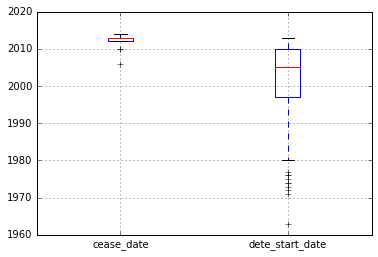

In [23]:
%matplotlib inline
dete_resignations.boxplot(column=['cease_date', 'dete_start_date'])


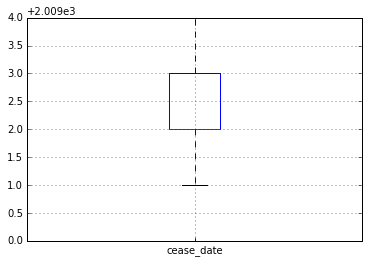

In [24]:
tafe_resignations.boxplot(column='cease_date')

In [25]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [26]:
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


A new column, institute_service is created by subtracting the dete_start_date column from cease_date

In [27]:
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)

We use 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction' columns in tafe_resignations to determine if an employee was dissatisfied. A new column, dissatisfied was then added with True or False values to reflect this. 

In [28]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction','dissatisfaction_with_the_department','physical_work_environment','lack_of_recognition', 'lack_of_job_security','work_location','employment_conditions','work_life_balance','workload']].any(axis=1, skipna=False)

We then did the same thing with dete_resignations using the columns 
* job_dissatisfaction.
* dissatisfaction_with_the_department.
* physical_work_environment.
* lack_of_recognition.
* lack_of_job_security.
* work_location.
* employment_conditions.
* work_life_balance.
* workload.

In [29]:
tafe_resignations_up = tafe_resignations.copy()
dete_resignations_up = dete_resignations.copy()

In [30]:
dete_resignations_up['institute']='DETE' 

In [31]:
tafe_resignations_up['institute']='TAFE'

In [32]:
# Combine the dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

In [33]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 53 columns):
Contributing Factors. Career Move - Private Sector     332 non-null object
Contributing Factors. Career Move - Public Sector      332 non-null object
Contributing Factors. Career Move - Self-employment    332 non-null object
Contributing Factors. Dissatisfaction                  332 non-null object
Contributing Factors. Ill Health                       332 non-null object
Contributing Factors. Interpersonal Conflict           332 non-null object
Contributing Factors. Job Dissatisfaction              332 non-null object
Contributing Factors. Maternity/Family                 332 non-null object
Contributing Factors. NONE                             332 non-null object
Contributing Factors. Other                            332 non-null object
Contributing Factors. Study                            332 non-null object
Contributing Factors. Travel                           332 non-null ob

In [34]:
combined_updated = combined.dropna(thresh = 500, axis =1).copy()

In [35]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 53 columns):
Contributing Factors. Career Move - Private Sector     332 non-null object
Contributing Factors. Career Move - Public Sector      332 non-null object
Contributing Factors. Career Move - Self-employment    332 non-null object
Contributing Factors. Dissatisfaction                  332 non-null object
Contributing Factors. Ill Health                       332 non-null object
Contributing Factors. Interpersonal Conflict           332 non-null object
Contributing Factors. Job Dissatisfaction              332 non-null object
Contributing Factors. Maternity/Family                 332 non-null object
Contributing Factors. NONE                             332 non-null object
Contributing Factors. Other                            332 non-null object
Contributing Factors. Study                            332 non-null object
Contributing Factors. Travel                           332 non-null ob

In [36]:
# Check the unique values
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
20.0                   7
15.0                   7
14.0                   6
10.0                   6
12.0                   6
17.0                   6
22.0                   6
16.0                   5
18.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
19.0                   3
39.0                   3
32.0                   3
36.0                   2
26.0                   2
28.0                   2
30.0                   2
25.0                   2


In [37]:
# Extract the years of service and convert the type to float
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

# Check the years extracted are correct
combined_updated['institute_service_up'].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [38]:
def year_cat(year):
    if pd.isnull(year):
        return np.nan
    elif year > 10:
        return 'Veteran'
    elif year > 6:
        return 'Established'
    elif year > 2:
        return 'Experienced'
    else:
        return 'New'
        

In [39]:
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(year_cat)

In [40]:
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

In [41]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [42]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

In [43]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [44]:
dissatisfied_category = combined_updated.pivot_table(values='dissatisfied', index='service_cat')
dissatisfied_category

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


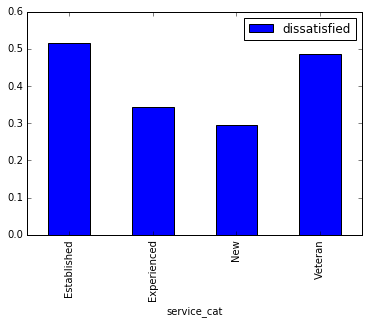

In [45]:
%matplotlib inline 
dissatisfied_category.plot(kind='bar')

In [46]:
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 12 columns):
age                     596 non-null object
cease_date              635 non-null float64
dissatisfied            651 non-null bool
employment_status       597 non-null object
gender                  592 non-null object
id                      651 non-null float64
institute               651 non-null object
institute_service       563 non-null object
position                598 non-null object
separationtype          651 non-null object
institute_service_up    563 non-null float64
service_cat             563 non-null object
dtypes: bool(1), float64(3), object(8)
memory usage: 56.7+ KB


In [47]:
combined_updated[['institute_service_up','institute']]

,institute_service_up,institute
0,7.0,DETE
1,18.0,DETE
2,3.0,DETE
3,15.0,DETE
4,3.0,DETE
5,14.0,DETE
6,5.0,DETE
7,NaN,DETE
8,30.0,DETE
9,32.0,DETE


In [48]:
combined_dropped = combined_updated.copy()
bool_null= combined_dropped['institute_service_up'].isnull()
bool_not_null = ~ bool_null
combined_dropped = combined_dropped[bool_not_null]
combined_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 563 entries, 0 to 650
Data columns (total 12 columns):
age                     561 non-null object
cease_date              561 non-null float64
dissatisfied            563 non-null bool
employment_status       563 non-null object
gender                  558 non-null object
id                      563 non-null float64
institute               563 non-null object
institute_service       563 non-null object
position                560 non-null object
separationtype          563 non-null object
institute_service_up    563 non-null float64
service_cat             563 non-null object
dtypes: bool(1), float64(3), object(8)
memory usage: 53.3+ KB


We drop rows in the dataframe where values are missing in institute_service_up column as we can't make our analysis without knowing an employee's length of service at the institutes 

We rename this new dataframe, combined_dropped

In [49]:
dissatisfied_cat = combined_dropped.pivot_table(values='dissatisfied', index='service_cat')
dissatisfied_cat

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


In [50]:
# Extract the age and convert the type to float
combined_dropped['age'] = combined_dropped['age'].astype('str').str.extract(r'(\d+)')
combined_dropped['age'] = combined_dropped['age'].astype('float')
combined_dropped['age'].value_counts().sort_index()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


20.0    10
21.0    59
26.0    63
31.0    61
36.0    68
41.0    89
46.0    73
51.0    69
56.0    51
61.0    18
Name: age, dtype: int64

In [51]:
def transform_age(val):
    if val > 49:
        return 'over 50'
    elif val > 39:
        return '40-50'
    elif val > 29:
        return '30-40'
    elif val > 19:
        return '20-30'
    else:
        return 'below 20'
combined_dropped['age_group'] = combined_dropped['age'].apply(transform_age)

In [52]:
combined_dropped['age_group'].value_counts()

40-50       162
over 50     138
20-30       132
30-40       129
below 20      2
Name: age_group, dtype: int64

In [53]:
# Group & sort dissatisfied employees by age_group
dissatisfied_age = combined_dropped.pivot_table(values='dissatisfied', index='age_group')
dissatisfied_age = dissatisfied_age.reindex(['below 20','20-30','30-40','40-50','over 50'])
dissatisfied_age

,dissatisfied
age_group,
below 20,0.000000
20-30,0.340909
30-40,0.364341
40-50,0.395062
over 50,0.420290


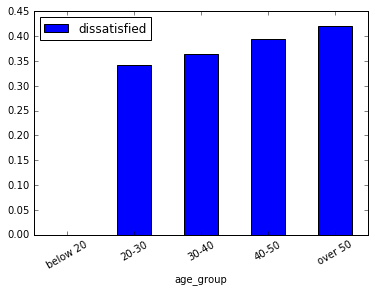

In [54]:
%matplotlib inline 
dissatisfied_age.plot(kind='bar', rot=30)

Instead of analyzing the survey results together, we analyze each survey separately. 
* Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?

In [55]:
# Group or separate dissatisfied employees by institute
dissatisfied_institute = combined_dropped.pivot_table(values='dissatisfied', index='institute')

In [56]:
dissatisfied_institute

,dissatisfied
institute,
DETE,0.501832
TAFE,0.265517


This suggests significantly more employees in DETE left due to some kind of a job dissatisfaction